In [24]:
import pandas as pd
import json
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.isri import ISRIStemmer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import joblib

## Loading data ...

In [2]:
with open('hespress_analysis.json', 'r', encoding='utf-8') as fichier_json:
    data = json.load(fichier_json)
data = pd.DataFrame(data)
data.head()

,title,category,key_words,source,year,month,month_name,day,day_name,hour,minute,key_point
0,تراجع المساحات المزروعة بالمغرب يعيد النظر فرض...,اقتصاد,"الاقتصاد, المساحات المزروعة, المناخ, محمد صديقي",هسبريس - أمال كنين,2024,4,أبريل,21,الأحد,15,38,المؤكد المعطيات المناخية للمملكة تغيرت بشكل مس...
1,تحصيل غرامات مخالفات للسير يوقف عمليات توثيق ع...,اقتصاد,"العقار, المجلس الأعلى للحسابات, رقمنة التوثيق,...",هسبريس - بدر الدين عتيقي,2024,4,أبريل,21,الأحد,14,0,وأكد تقرير سابق للمجلس الأعلى للحسابات عملية ت...
2,بورصة البيضاء تنهي تداولات الأسبوع بالأخضر,اقتصاد,"الدار البيضاء, بورصة, مازي",هسبريس - و.م.ع,2024,4,أبريل,21,الأحد,13,16,صعيد القيم الفردية تم تسجيل أقوى ارتفاعات الأس...
3,Sketch تفتتح متجرا جديدا للأثاث بالرباط,اقتصاد,"Sketch, الأثاث, الرباط",هسبريس من الرباط,2024,4,أبريل,21,الأحد,13,1,وت فيد المعطيات صر ح مدير عام المجموعة المتجر ...
4,المغرب يعرض بجنيف سياسته التجارية,اقتصاد,"الاقتصاد المغربي, التجارة, كورونا",هسبريس - و.م.ع,2024,4,أبريل,21,الأحد,11,17,وسيتم تسليط الضوء إطار الإجراء مناخ الأعمال وا...


In [3]:
data['key_point'] = data['key_words'] + ' ' + data['key_point']

In [4]:
def checkAlpha(text):
    return ' '.join([word for word in text.split() if word.isalpha() or word != ','])
data['key_point'] = data['key_point'].apply(lambda x : checkAlpha(x))

In [5]:
from string import punctuation
def remove_punctuation(text):
    # Votre code ici
    return ''.join([word for word in text if word not in punctuation])
data['key_point'] = data['key_point'].apply(lambda x : remove_punctuation(x))

## Spliting data (train , test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['key_point'], data['category'] ,test_size=0.2)

## SVM

In [7]:
svm_classifier = SVC(kernel="linear", probability=True)

svm_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', svm_classifier)
])

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Classifier Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classifier Accuracy: 0.9567251461988304


## Naive Bayes

In [8]:
nb_classifier = MultinomialNB()

nb_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', nb_classifier)
])

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classifier Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classifier Accuracy: 0.928654970760234


## Random Forest

In [9]:
rf_classifier = RandomForestClassifier()

rf_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', rf_classifier)
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9263157894736842


## Logistic Regression

In [10]:
lr_classifier = LogisticRegression(max_iter=1000)

lr_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', lr_classifier)
])

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classifier Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Classifier Accuracy: 0.9461988304093567


## Svm Evaluation 

In [26]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

      اقتصاد       0.95      0.94      0.94       232
       رياضة       1.00      0.98      0.99       201
       سياسة       0.93      0.93      0.93       207
   فن وثقافة       0.95      0.99      0.97       215

    accuracy                           0.96       855
   macro avg       0.96      0.96      0.96       855
weighted avg       0.96      0.96      0.96       855



['Economy', 'Sports', 'Politics', 'Culture']


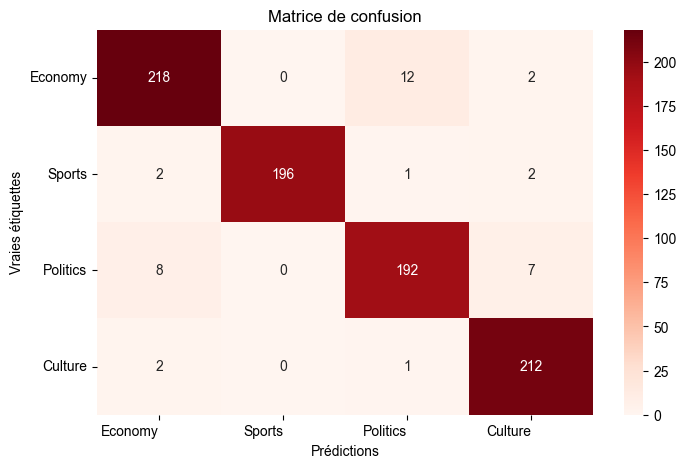

In [56]:
noms_classes = ['Economy' ,'Sports','Politics', 'Culture' ]
print(noms_classes)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',xticklabels=noms_classes, yticklabels=noms_classes)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')

plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)

plt.show()

In [18]:
article = input('Entrer votre article : ')
svm_model.predict([article])

Entrer votre article :  طق الجافة والمهددة بمعرفة تداعيات خطيرة بسبب التقلبات المناخية يعرفها العالم وتعرفها الكرة الأرضية ونبه العرب تصريح لهسبريس المغرب يوجد حزام جغرافي ومناخي الأخطر المستوى العالمي وهناك دراسات تدل أفق 2050 منطقة حوض البحر الأبيض المتوسط المنطقة الأكثر جفافا ستعرف تداعيات يسمى الاحتباس الحراري رأسها مسألة الجفاف والتصحر وتراجع المساحات المزروعة ذلك وأشار الخبير الاقتصادي المعطيات الجديدة أكد خلالها وزير الفلاحة المساحات المزروعة المملكة تراجعت السنة بـ31 المائة تؤكد أننا أصبحنا نعيش حالة عادية بالنسبة للمملكة ويجب الحكومة والدولة تأخذ بعين الاعتبار المعطى كمحدد أساسي يتعلق بمستقبل الاستراتيجيات الاقتصادية والتنموية للمملكة ودعا المتحدث ذاته ضرورة الاعتراف بأن المملكة تعد بلدا فلاحيا النشاط الفلاحي المغرب سيتراجع نظرا لتراجع التساقطات المطرية تفرض تراجعا المساحات المزروعة منبها ضرورة المراهنة الرفع فعالية القطاع الفلاحي والرفع فعالية الأنشطة الفلاحية جميع المستويات فاعلية المساحات المسقية فعالية مجهود السقي خاصة يتعلق بضرورة تعميم السقي بالتنقيط دعا العرب رفع فعالية

array(['اقتصاد'], dtype=object)

In [25]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [1]:
import joblib

svm_model = joblib.load('svm_model.pkl')

In [3]:
article = input('Entrer votre article : ')
svm_model.predict([article])

Entrer votre article :  لم يكن المهاجم الدولي المغربي أيوب الكعبي ليحلم بالوصول إلى ما حققه مساء الأربعاء، في أثينا، حين تسبب زلزال تركيا بمغادرته فريقه هاتاي سبور للبحث عن بديل كان “السد القطري” الذي شكل محطة عبوره نحو الانتقال إلى أولمبياكوس اليوناني.  وحتى إن أولمبياكوس لم يكن في حساباته على الإطلاق حين تعاقد مع المغربي بأنه سيحقق ما عجزت عنه جميع الأندية اليونانية مجتمعة، وهو منح البلاد لقبها القاري الأوّل.  لكن هذا الأمر تحقق مساء الأربعاء على الأراضي اليونانية، في العاصمة أثينا بالتحديد، حين تغلب أولمبياكوس على فيورنتينا الإيطالي في نهائي مسابقة “كونفرنس ليغ” بهدف وحيد سجله قبل أربع دقائق على نهاية الشوط الإضافي الثاني


array(['رياضة'], dtype=object)